In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM

In [2]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		end_ix = i + n_features
		if end_ix > len(timeseries_data)-1:
			break
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
timeseries_data = [110, 135, 143, 156, 148, 172, 175, 168, 190]
n_steps = 3
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
X

array([[110, 135, 143],
       [135, 143, 156],
       [143, 156, 148],
       [156, 148, 172],
       [148, 172, 175],
       [172, 175, 168]])

In [5]:
y

array([156, 148, 172, 175, 168, 190])

In [6]:
X.shape, y.shape

((6, 3), (6,))

In [7]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [8]:
model = Sequential()
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(256, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs= 1000)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 29070.3340
Epoch 2/1000
1/1 [==============================] - 0s 22ms/step - loss: 27831.0293
Epoch 3/1000
1/1 [==============================] - 0s 23ms/step - loss: 26562.9844
Epoch 4/1000
1/1 [==============================] - 0s 20ms/step - loss: 25143.6973
Epoch 5/1000
1/1 [==============================] - 0s 19ms/step - loss: 23516.2734
Epoch 6/1000
1/1 [==============================] - 0s 36ms/step - loss: 21659.3262
Epoch 7/1000
1/1 [==============================] - 0s 23ms/step - loss: 19548.1816
Epoch 8/1000
1/1 [==============================] - 0s 19ms/step - loss: 17107.5410
Epoch 9/1000
1/1 [==============================] - 0s 24ms/step - loss: 14265.3350
Epoch 10/1000
1/1 [==============================] - 0s 25ms/step - loss: 11030.2930
Epoch 11/1000
1/1 [==============================] - 0s 24ms/step - loss: 7577.7397
Epoch 12/1000
1/1 [==============================] - 0s 20ms/step - loss: 429

In [11]:
x_input = np.array([175, 168, 190])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1

print(lst_output)

[197.56161]
1 day input [168.         190.         197.56161499]
1 day output [[194.0475]]
2 day input [190.         197.56161499 194.04750061]
2 day output [[212.31322]]
3 day input [197.56161 194.0475  212.31322]
3 day output [[223.49396]]
4 day input [194.0475  212.31322 223.49396]
4 day output [[224.70741]]
5 day input [212.31322 223.49396 224.70741]
5 day output [[239.94589]]
6 day input [223.49396 224.70741 239.94589]
6 day output [[253.61072]]
7 day input [224.70741 239.94589 253.61072]
7 day output [[259.68387]]
8 day input [239.94589 253.61072 259.68387]
8 day output [[273.83444]]
9 day input [253.61072 259.68387 273.83444]
9 day output [[289.13782]]
[197.56161, 194.0475, 212.31322, 223.49396, 224.70741, 239.94589, 253.61072, 259.68387, 273.83444, 289.13782]


In [12]:
import matplotlib.pyplot as plt
day_new = np.arange(1,10)
day_pred = np.arange(10,20)

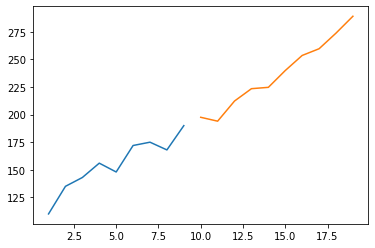

In [13]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)